<a href="https://colab.research.google.com/github/Leomutz/NIDS1/blob/main/2025_06_March_UNSW_NB15_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Comet with Keras
## install dependencies
%pip install -U "comet_ml>=3.44.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 723.1/723.1 kB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 14.8 MB/s eta 0:00:00
  Attempting uninstall: python-box
    Found existing installation: python-box 7.3.2
    Uninstalling python-box-7.3.2:
      Successfully uninstalled python-box-7.3.2


In [ ]:
# Comet login
import comet_ml

comet_ml.login()

Please paste your Comet API key from https://www.comet.com/api/my/settings/
(api key may not show as you type)
Comet API key: ··········


COMET INFO: Valid Comet API Key saved in /root/.comet.config (set COMET_CONFIG to change where it is saved).


In [ ]:
# Comet experiment
experiment = comet_ml.start(
    project_name = "comet-Alexnet-notebook",
    experiment_config = comet_ml.ExperimentConfig(
        auto_histogram_activation_logging=True,
        auto_histogram_weight_logging=True,
        auto_param_logging=True,
        auto_histogram_gradient_logging=True,
    )
)

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: keras, tensorboard, tensorflow, sklearn.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/aimldl20234-gmail-com/comet-alexnet-notebook/20600166f8654664877556e079dde365



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install tab2img
!pip install tensorflow==2.12.0
#!pip install prettytable
!pip install tensorrt

  Using cached tensorrt-10.9.0.34.tar.gz (40 kB)
  Preparing metadata (setup.py) ... done
  Using cached tensorrt_cu12-10.9.0.34.tar.gz (18 kB)
  Preparing metadata (setup.py) ... done
  Using cached tensorrt_cu12_libs-10.9.0.34.tar.gz (704 bytes)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.3 MB/s eta 0:00:00
  Created wheel for tensorrt: filename=tensorrt-10.9.0.34-py2.py3-none-any.whl size=46629 sha256=fef91b341e38a594e23473b7e9d540aeecca1c5b61c30dc272723a3ddcb6b954
  Stored in directory: /root/.cache/pip/wheels/3a/4d/72/f28cb367f1435d026243047d4f60fde8f1c9cbb06a204f842f
  Created wheel for tensorrt_cu12: filename=tensorrt_cu12-10.9.0.34-py2.py3-none-any.whl size=17465 sha256=989c44a26b60e2fb2b75a142ad6b64ef096654ed6dd40b919dcf722905cc45e3
  Stored in directory: /root/.cache/pip/wheels/75/09/76/6b405075fe4c04097f5713ec0a688df7892aaee823b

In [ ]:
import time
import json
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Conv1D, MaxPool1D, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler
from tab2img.converter import Tab2Img
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from prettytable import PrettyTable
from scipy.stats import loguniform, randint, uniform
from pprint import pprint

from keras.regularizers import l2
#keras.utils.set_random_seed(812)

from sklearn.model_selection import KFold

In [ ]:
# load the dataset
df_train = pd.read_csv("UNSW_NB15_training-set.csv")
df_test = pd.read_csv("UNSW_NB15_testing-set.csv")

df_train.shape, df_test.shape

((175341, 45), (82332, 45))

In [ ]:
# irrelevant features need to be removed
# 'id' is to be removed and 'attact_cat' is to be removed b'se it is represented by 'label'
column_drop = ['id', 'attack_cat']
df_train.drop(column_drop, axis=1, inplace=True)
df_test.drop(column_drop, axis=1, inplace=True)

In [ ]:
#df_train.describe(include='all')
df_train.shape, df_test.shape

((175341, 43), (82332, 43))

In [ ]:
# identify the missing values
df_train.isnull().values.any(), df_test.isnull().values.any()

(False, False)

In [ ]:
#get binary columns
#binary_train = [col for col in df_train if (len(df_train[col].value_counts()) > 0) & all(df_train[col].value_counts().index.isin([0, 1]))]
#binary_test = [col for col in df_test if (len(df_test[col].value_counts()) > 0) & all(df_test[col].value_counts().index.isin([0, 1]))]

#print(f'Binary columns in:\n Training dataset are: {len(binary_train)}\n Testing dataset are: {len(binary_test)}')

In [ ]:
#discrete_train = df_train.select_dtypes(include=['int']).columns.tolist()
#continuous_train = df_train.select_dtypes(include=['float']).columns.tolist()

#print('Dicrete data', len(discrete_train))
#print('Continuous data',len(continuous_train))

In [ ]:
#get categorical columns
cat_train = df_train.select_dtypes(include=['object']).columns.tolist()
cat_test = df_test.select_dtypes(include=['object']).columns.tolist()
print(f'Categorical columns in:\n Training dataset are: {len(cat_train)}\n Testing dataset are: {len(cat_test)}')

Categorical columns in:
 Training dataset are: 3
 Testing dataset are: 3


In [ ]:
# categorical columns
cat_train, cat_test

(['proto', 'service', 'state'], ['proto', 'service', 'state'])

In [ ]:
oh= OneHotEncoder(sparse_output=False, handle_unknown="ignore").set_output(transform="pandas")
# train dataset
one_hot_encoded_train=oh.fit_transform(df_train[['proto', 'service', 'state']])
df_train_ohe = pd.concat([df_train,one_hot_encoded_train],axis=1).drop(columns=['proto', 'service', 'state'])

In [ ]:
# test dataset only Transform (without fit)
one_hot_encoded_test=oh.transform(df_test[['proto', 'service', 'state']])
df_test_ohe = pd.concat([df_test,one_hot_encoded_test],axis=1).drop(columns=['proto', 'service', 'state'])

In [ ]:
df_train_ohe.shape, df_test_ohe.shape

((175341, 195), (82332, 195))

In [ ]:
# verify the columns in train and test sets are the same
print(all(x == y for x, y in zip(df_test_ohe.columns, df_train_ohe.columns)))  # Output: True

True


In [ ]:
#copy data from the original
df_data_train = df_train_ohe.copy()
df_data_test = df_test_ohe.copy()
df_data_train.shape, df_data_test.shape

((175341, 195), (82332, 195))

In [ ]:
df_data_train['label'].unique()

array([0, 1])

In [ ]:
df_data_test['label'].unique()

array([0, 1])

In [ ]:
#separate labels from the dataset
y_train = df_data_train.pop('label')

# the remaining data will be X
X_train = df_data_train
print(X_train.shape, y_train.shape)

(175341, 194) (175341,)


In [ ]:
#separate labels from the dataset
y_test = df_data_test.pop('label')

# the remaining data will be X
X_test = df_data_test
print(X_test.shape, y_test.shape)

(82332, 194) (82332,)


In [ ]:
# binary classification labels
print(y_train.unique())

[0 1]


In [ ]:
# binary classification labels
print(y_test.unique())

[0 1]


In [ ]:
X_train.shape, X_test.shape

((175341, 194), (82332, 194))

In [ ]:
#scaler = MinMaxScaler(feature_range=(0,255))
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_test.values

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# convert dataset into images
# training dataset
model_nsl = Tab2Img()
images_bin_train = model_nsl.fit_transform(X_train, y_train.values)

In [ ]:
# convert dataset into images
# test dataset
images_bin_test = model_nsl.transform(X_test)

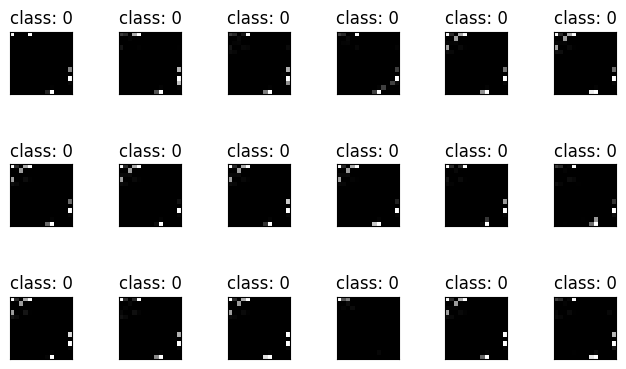

In [ ]:
# Visualize the dataset
for i in range(18):
    plt.subplot(3, 6, i+1)
    plt.tight_layout()
    plt.imshow(images_bin_train[i], cmap='gray', interpolation='none')
    plt.title('class: {}'.format(y_train.values[i]))
    plt.yticks([])
    plt.xticks([])

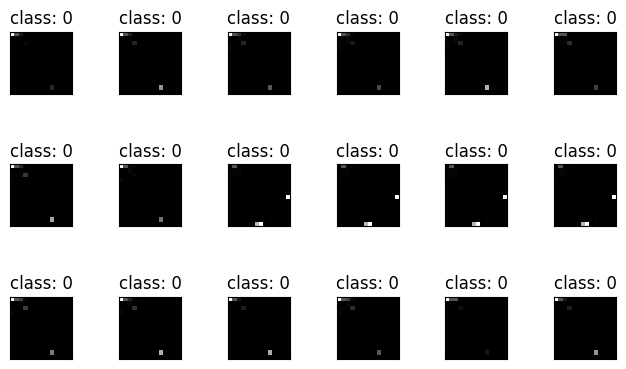

In [ ]:
for i in range(18):
    plt.subplot(3, 6, i+1)
    plt.tight_layout()
    plt.imshow(images_bin_test[i], cmap='gray', interpolation='none')
    plt.title('class: {}'.format(y_test.values[i]))
    plt.yticks([])
    plt.xticks([])

In [ ]:
images_bin_train.shape, images_bin_test.shape

((175341, 14, 14), (82332, 14, 14))

In [ ]:
# reshaping
X_train_f = images_bin_train.reshape(images_bin_train.shape[0], images_bin_train.shape[1],images_bin_train.shape[2], 1)
X_test_f = images_bin_test.reshape(images_bin_test.shape[0],images_bin_test.shape[1],images_bin_test.shape[2], 1)

In [ ]:
X_train_f.shape, X_test_f.shape

((175341, 14, 14, 1), (82332, 14, 14, 1))

In [ ]:
# scaling to [0,1]
X_train_f = X_train_f/255
X_test_f = X_test_f/255

In [ ]:
def get_cnn_model(dropout=0.45, learning_rate=0.01, decay=1e-6):
  # multi-class classification

  model_bin = Sequential()
  model_bin.add(Conv2D(32,3,padding='same', input_shape=(14,14,1),activation='relu'))
  model_bin.add(BatchNormalization())
  model_bin.add(MaxPool2D((2,2)))

  model_bin.add(Conv2D(64,3,padding='same',activation='relu'))
  model_bin.add(BatchNormalization())
  model_bin.add(MaxPool2D((2,2)))


  model_bin.add(Conv2D(128,3,padding='same',activation='relu'))
  model_bin.add(BatchNormalization())

  model_bin.add(Flatten())
  model_bin.add(Dense(1000, activation='relu'))
  model_bin.add(Dropout(dropout))

  model_bin.add(Dense(500, activation='relu'))
  model_bin.add(Dropout(dropout))

  model_bin.add(Dense(250, activation='relu'))
  model_bin.add(Dropout(dropout))

  model_bin.add(Dense(125, activation='relu'))
  model_bin.add(Dropout(dropout))

  model_bin.add(Dense(50, activation='relu'))
  model_bin.add(Dropout(dropout))

  model_bin.add(Dense(units=1, activation='softmax'))

  optimizer = keras.optimizers.Adam(learning_rate=learning_rate, decay=decay)
  model_bin.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

  return model_bin

In [ ]:
'''
batch_size = [32, 64, 128]
dropout = [0.4, 0.45, 0.5]
learning_rate = loguniform(1e-6, 1e-3)
decay = loguniform(1e-7, 1e-4)
epochs = 150
'''

'''
param_dist = {
    'learning_rate': uniform(0.001, 0.1),
    'batch_size': randint(16, 256),
    #'decay': loguniform(1e-6, 0.1),
    'dropout': uniform(0.3, 0.5)
}
'''

'''
param_dist = {
    'learning_rate': loguniform(1e-7, 1e-3),
    'batch_size': [128, 256],
    'decay': loguniform(1e-8, 1e-4),
    'dropout': [0.4, 0.45, 0.5]
}
'''
'''
param_dist = {
    'learning_rate': [1e-7, 1e-3],
    'batch_size': [128, 256],
    'decay': [1e-8, 1e-4],
    'dropout': [0.4, 0.5]
}
'''
param_dist = {
    'learning_rate': [1e-7, 1e-3], # 2 choices each
    'batch_size': [128, 256],
    'decay': [1e-8, 1e-4],
    'dropout': [0.4, 0.5]
}

In [ ]:
# tuning hyperparameters
print('[INFO] initializing model...')
model = KerasClassifier(build_fn=get_cnn_model, verbose=1, epochs=3)

[INFO] initializing model...


<ipython-input-97-eb958c6b3857>:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=get_cnn_model, verbose=1, epochs=3)


In [ ]:
# random search with k-fold cross-validation
print('[INFO] performing random search...')
rand_search = RandomizedSearchCV(
    estimator=model,
    n_iter=2,n_jobs=-1,
    cv=2,
    param_distributions=param_dist,
    scoring='accuracy')

rand_results = rand_search.fit(X_train_f, y_train)

# save results to a file
rand_results_file = pd.DataFrame(rand_results.cv_results_)
rand_results_file.to_csv('Random_search_file.csv', index=False)


[INFO] performing random search...
Epoch 1/3
1370/1370 [==============================] - 116s 84ms/step - loss: 0.6802 - accuracy: 0.6806
Epoch 2/3
1370/1370 [==============================] - 111s 81ms/step - loss: 0.6413 - accuracy: 0.6806
Epoch 3/3
1370/1370 [==============================] - 115s 84ms/step - loss: 0.6101 - accuracy: 0.6806


In [ ]:
experiment.log_parameters(rand_results.best_estimator_.get_params())

In [ ]:
pprint(rand_results.best_estimator_.get_params())

{'batch_size': 128,
 'build_fn': <function get_cnn_model at 0x793b5686f7e0>,
 'decay': 1e-08,
 'dropout': 0.4,
 'epochs': 3,
 'learning_rate': 1e-07,
 'verbose': 1}


In [ ]:
rand_results.best_params_

{'learning_rate': 1e-07, 'dropout': 0.4, 'decay': 1e-08, 'batch_size': 128}

In [ ]:
# run with the best parameters
def get_cnn_model(dropout=0.4, learning_rate=1e-07, decay=1e-08):
  # binary classification

  model_bin = Sequential()
  model_bin.add(Conv2D(32,3,padding='same', input_shape=(14,14,1),activation='relu'))
  model_bin.add(BatchNormalization())
  model_bin.add(MaxPool2D((2,2)))

  model_bin.add(Conv2D(64,3,padding='same',activation='relu'))
  model_bin.add(BatchNormalization())
  model_bin.add(MaxPool2D((2,2)))


  model_bin.add(Conv2D(128,3,padding='same',activation='relu'))
  model_bin.add(BatchNormalization())

  model_bin.add(Flatten())
  model_bin.add(Dense(1000, activation='relu'))
  model_bin.add(Dropout(dropout))

  model_bin.add(Dense(500, activation='relu'))
  model_bin.add(Dropout(dropout))

  model_bin.add(Dense(250, activation='relu'))
  model_bin.add(Dropout(dropout))

  model_bin.add(Dense(125, activation='relu'))
  model_bin.add(Dropout(dropout))

  model_bin.add(Dense(50, activation='relu'))
  model_bin.add(Dropout(dropout))

  model_bin.add(Dense(units=1, activation='sigmoid'))

  optimizer = keras.optimizers.Adam(learning_rate=learning_rate, decay=decay)
  model_bin.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

  return model_bin

model_final = get_cnn_model()

In [ ]:
#model_final.summary()

In [ ]:
# reproducibility
np.random.seed(42)

# define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=9, restore_best_weights=True)

# training the model with the best parameters
with experiment.train():
  history = model_final.fit(X_train_f, y_train, epochs=10, batch_size=128,validation_split=0.2, shuffle=True,
                          callbacks=[early_stopping])

Epoch 1/10
1096/1096 [==============================] - 93s 84ms/step - loss: 0.8211 - accuracy: 0.4979 - val_loss: 0.5695 - val_accuracy: 0.9962
Epoch 2/10
1096/1096 [==============================] - 92s 84ms/step - loss: 0.7698 - accuracy: 0.5288 - val_loss: 0.5041 - val_accuracy: 0.9993
Epoch 3/10
1096/1096 [==============================] - 93s 85ms/step - loss: 0.7295 - accuracy: 0.5574 - val_loss: 0.4591 - val_accuracy: 0.9998
Epoch 4/10
1096/1096 [==============================] - 91s 83ms/step - loss: 0.7000 - accuracy: 0.5850 - val_loss: 0.4228 - val_accuracy: 0.9998
Epoch 5/10
1096/1096 [==============================] - 92s 84ms/step - loss: 0.6726 - accuracy: 0.6118 - val_loss: 0.3885 - val_accuracy: 0.9998
Epoch 6/10
1096/1096 [==============================] - 94s 86ms/step - loss: 0.6519 - accuracy: 0.6345 - val_loss: 0.3574 - val_accuracy: 1.0000
Epoch 7/10
1096/1096 [==============================] - 92s 84ms/step - loss: 0.6320 - accuracy: 0.6578 - val_loss: 0.3289 -

In [ ]:
# history.history['loss'], history.history['accuracy'],
history.history.get('val_loss',[]), history.history.get('val_accuracy',[])

([0.5695377588272095,
  0.5040669441223145,
  0.4591366946697235,
  0.4227527379989624,
  0.3885190188884735,
  0.35739848017692566,
  0.3289392590522766,
  0.30093634128570557,
  0.2762106955051422,
  0.25340044498443604],
 [0.9961789846420288,
  0.9992871284484863,
  0.9998003840446472,
  0.9998003840446472,
  0.9998003840446472,
  1.0,
  1.0,
  0.9999715089797974,
  0.9992871284484863,
  0.9992300868034363])

In [ ]:
# predicting target on test data
test_pred = model_final.evaluate(X_test_f, y_test, verbose=1)
print(f'Test results\n Loss: {test_pred[0]}\n Accuracy: {test_pred[1]*100}%')

2573/2573 [==============================] - 20s 8ms/step - loss: 0.5775 - accuracy: 0.7648
Test results
 Loss: 0.5775127410888672
 Accuracy: 76.47815942764282%


In [ ]:
#experiment.log_parameters(rand_results.best_estimator_.get_params())
experiment.log_parameters(test_pred)

COMET WARNING: [0.5775127410888672, 0.7647815942764282] passed to Experiment.log_parameters converted to an empty mapping; ignoring


In [ ]:
experiment.log_metrics({
    'Test_accuracy': test_pred[1],
    'Test_loss': test_pred[0]
}
)

In [ ]:
# on test dataset
y_pred = model_final.predict(X_test_f)

2573/2573 [==============================] - 19s 7ms/step


In [ ]:
# print the classification report on the test data

class_names = ['Normal', 'Attack']
y_rounded_pred = np.round(y_pred)
print("Classification Report on Test data\n",
     classification_report(y_test, y_rounded_pred, target_names=class_names))

Classification Report on Test data
               precision    recall  f1-score   support

      Normal       1.00      0.48      0.65     37000
      Attack       0.70      1.00      0.82     45332

    accuracy                           0.76     82332
   macro avg       0.85      0.74      0.73     82332
weighted avg       0.83      0.76      0.74     82332



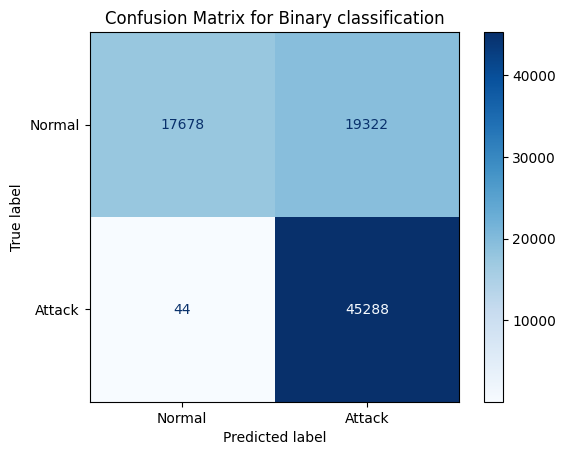

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_rounded_pred)
#cm = confusion_matrix(y_test.argmax(axis=1), y_rounded_pred.argmax(axis=1))
cm_fig = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
cm_fig.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Binary classification')
#plt.savefig('./plots_24December2024/confusion_matrix_multi-class_rs_256batch_0.5splitv1_22epochs_9patience_5February2025.eps')
plt.show()

In [ ]:
experiment.log_parameters(cm)

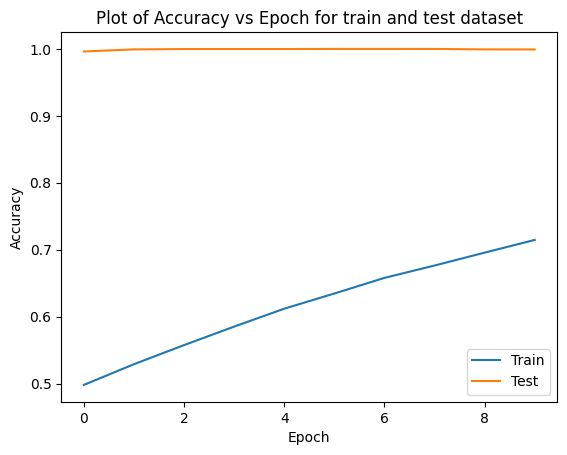

In [ ]:
# plot of accuracy vs epoch for train and test dataset
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Plot of Accuracy vs Epoch for train and test dataset')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
#plt.savefig('./plots_24December2024/plot_accuracy_epoch_multiclass_rs_256batch_0.5splitv1_22epochs_9patience.eps')
plt.show()